# Data Visualization

## Matplotlib

### Exercise 3
This exercise uses the derived data created in level 7, exercise 12. You should do the following:  
a. Plot the volume-weighted average daily returns using a line chart.  
b. Plot the moving average daily return in a separate line chart. Try using different moving windows and a gaussian smoother to see what gives you the best line without losing too
much granularity.  
c. Overlay the plots from a and b.  
d. Plot the moving average volume on the same plot.  

In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd

# Load data
%store -r dataDaily
hist = dataDaily
hist.tail()

,Date,Ticker,Close,Dividends,High,Low,Open,Stock Splits,Volume,Daily Return,1-week MA Daily Return,Rolling Cumulative Volume
3906315,2020-10-30,YUM,93.330002,0.0,95.209999,92.349998,94.360001,0.0,2139000.0,0.071035,0.634927,1.811094e+13
3906316,2020-10-30,ZBH,132.100006,0.0,134.820007,130.050003,133.490005,0.0,1256400.0,0.415408,0.863042,1.811094e+13
3906317,2020-10-30,ZBRA,283.640015,0.0,290.970001,281.019989,290.000000,0.0,304300.0,1.147161,1.003142,1.811095e+13
3906318,2020-10-30,ZION,32.270000,0.0,32.310001,31.240000,31.330000,0.0,1732100.0,-0.886229,0.952237,1.811095e+13
3906319,2020-10-30,ZTS,158.550003,0.0,161.320007,156.250000,160.020004,0.0,2078300.0,3.913232,0.932121,1.811095e+13


#### a. Plot the volume-weighted average daily returns using a line chart.

,Ticker,Close,Dividends,High,Low,Open,Stock Splits,Volume,Daily Return,1-week MA Daily Return,Rolling Cumulative Volume
Date,,,,,,,,,,,
1980-12-12,AAPL,0.101261,0.0,0.101701,0.101261,0.101261,0.0,469033600.0,-0.840274,0.805592,1.900194e+11
1980-12-15,AAPL,0.095978,0.0,0.096418,0.095978,0.096418,0.0,175884800.0,-0.848607,0.818780,1.903634e+11
1980-12-16,AAPL,0.088934,0.0,0.089374,0.088934,0.089374,0.0,105728000.0,-0.861018,0.784736,1.905921e+11
1980-12-17,AAPL,0.091135,0.0,0.091575,0.091135,0.091135,0.0,86441600.0,-0.857577,0.759881,1.908579e+11
1980-12-18,AAPL,0.093777,0.0,0.094217,0.093777,0.093777,0.0,73449600.0,-0.853449,0.707006,1.911147e+11
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,AAPL,115.050003,0.0,116.550003,112.879997,114.010002,0.0,111850700.0,-0.239138,2.850485,1.809741e+13
2020-10-27,AAPL,116.599998,0.0,117.279999,114.540001,115.489998,0.0,92276800.0,-0.224786,2.975881,1.809981e+13
2020-10-28,AAPL,111.199997,0.0,115.430000,111.099998,115.050003,0.0,143937800.0,-0.240333,3.017722,1.810226e+13


<Figure size 720x360 with 0 Axes>

Text(0, 0.5, 'AAPL Daily Return')

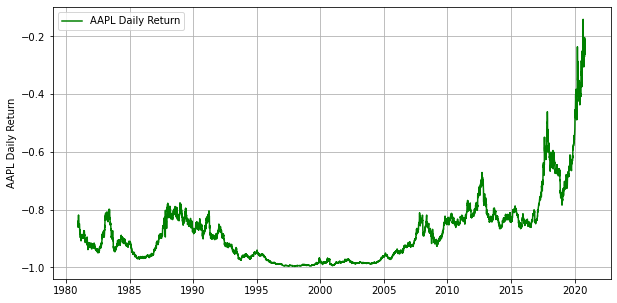

In [24]:
import matplotlib.pyplot as plt # Similar to Matlab style

aaplData = hist[hist['Ticker']=='AAPL'].set_index('Date')
aaplData

plt.figure(figsize=(10,5))  # set figure size
           
plt.plot(aaplData['Daily Return'], 'g-')  
plt.ylabel('AAPL Daily Return')
plt.grid()
plt.legend(['AAPL Daily Return'])
plt.show()

#### b. Plot the moving average daily return in a separate line chart. Try using different moving windows and a gaussian smoother to see what gives you the best line without losing too much granularity.

<Figure size 720x360 with 0 Axes>

Text(0, 0.5, 'AAPL 1-week MA Daily Return')

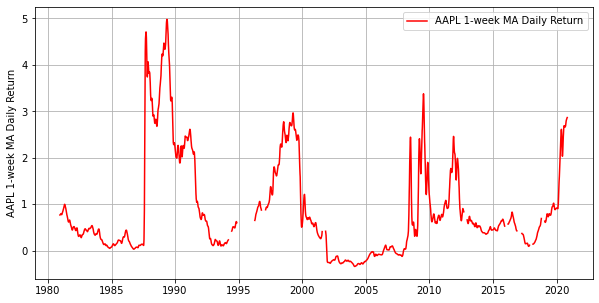

In [25]:
from scipy.ndimage import gaussian_filter

plt.figure(figsize=(10,5))  # set figure size

aaplData['Smoothed 1-week MA Daily Return'] = gaussian_filter(aaplData['1-week MA Daily Return'], 8)  # smoothing factor sigma = 8

plt.plot(aaplData[['Smoothed 1-week MA Daily Return']], 'r-')  
plt.ylabel('AAPL 1-week MA Daily Return')
plt.grid()
plt.legend(['AAPL 1-week MA Daily Return'])
plt.show()

#### c. Overlay the plots from a and b.

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Daily Return')

Text(0, 0.5, 'Smoothed 1-week MA Daily Return')

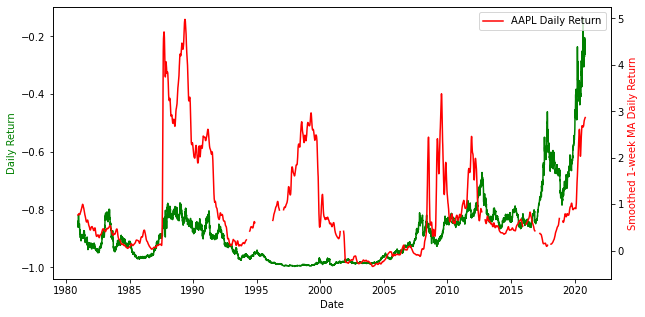

In [27]:
          
fig, ax1 = plt.subplots(figsize=(10, 5))

ax2 = ax1.twinx()  # Create twin axes
ax1.plot(aaplData['Daily Return'], 'g-')
ax2.plot(aaplData['Smoothed 1-week MA Daily Return'], 'r-')

ax1.set_xlabel('Date')
ax1.set_ylabel('AAPL Daily Return', color='g')
ax2.set_ylabel('AAPL Smoothed 1-week MA Daily Return', color='r')

plt.show()

#### d. Plot the moving average volume on the same plot.

Text(0.5, 0, 'Date')

Text(0, 0.5, 'AAPL Daily Return')

Text(0, 0.5, 'AAPL Rolling Cunulative Volume')

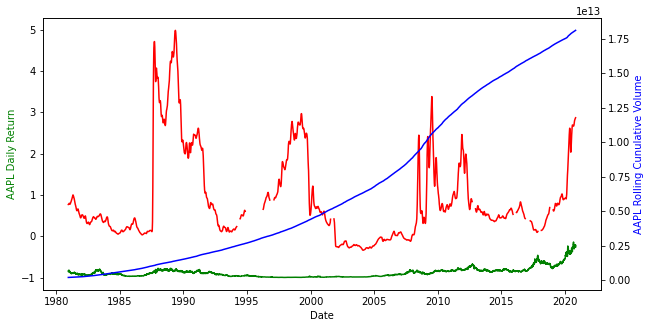

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax2 = ax1.twinx()  # Create twin axes
ax1.plot(aaplData['Daily Return'], 'g-', aaplData['Smoothed 1-week MA Daily Return'], 'r-')
ax2.plot(aaplData['Rolling Cumulative Volume'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('AAPL Daily Return', color='g')
ax2.set_ylabel('AAPL Rolling Cunulative Volume', color='b')

plt.show()